In [ ]:
# Mounting
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the dataset
path='/content/gdrive/MyDrive/NLP/'
file = path + 'code-mixed-script(uncleaned).xlsx'

dataset= pd.read_excel(file)
dataset.head()

,LABEL,COMMENT
0,EM,થેંક્યુ સર 👌👌👌👌
1,EM,વેરી ગુડ સાહેબ
2,EM,સુપર
3,EM,વેરી ગુડ હિમેશ રેશમિયા.
4,EM,I m ગુજરાતી...H R...


##**1) English Pure only**

In [ ]:
r =dataset[dataset['LABEL'].isin(['EP'])]
r.head()

,LABEL,COMMENT
20,EP,You are very beautiful.
21,EP,Nice
22,EP,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ
23,EP,Super
24,EP,Supar comedy


In [ ]:
import string
def clean_text(text):
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in string.punctuation])
        return text_nonpunct

r['comclean'] = r['COMMENT'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,LABEL,COMMENT,comclean
20,EP,You are very beautiful.,You are very beautiful
21,EP,Nice,Nice
22,EP,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ
23,EP,Super,Super
24,EP,Supar comedy,Supar comedy


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(analyzer=clean_text)

X = cv1.fit_transform(r['COMMENT'])
print(X.shape)

(2401, 241)


In [ ]:
print(cv1.get_feature_names())

['\n', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x81', '\x8d', '\x8f', '\x9d', '£', '¤', '§', 'ª', '«', '\xad', '®', '°', '³', '¸', 'º', '»', '¾', '¿', 'Ç', 'à', 'â', 'ï', 'ð', 'ñ', 'ô', 'Œ', 'œ', 'Š', 'Ÿ', 'ž', 'ƒ', 'ˆ', '˜', '̽', '͓', 'આ', 'ઓ', 'ગ', 'ચ', 'જ', 'ડ', 'ત', 'થ', 'ન', 'પ', 'ફ', 'ય', 'ર', 'લ', 'શ', 'સ', 'હ', 'ા', 'ી', 'ુ', 'ે', 'ો', '્', '\u200d', '–', '‘', '’', '‚', '„', '‡', '…', '‹', '€', '™', 'ℹ', '☺', '♂', '♥', '⚘', '⚰', '✌', '✍', '✨', '❣', '❤', '️', '🇦', '🇨', '🇮', '🇶', '🌁', '🌷', '🌸', '🌹', '🍺', '🍻', '🎇', '🎉', '🎙', '🎤', '🎧', '🎩', '🎬', '🎵', '🎶', '🏁', '🏻', '🏼', '👇', '👉', '👌', '👍', '👏', '👑', '👒', '👕', '👖', '👦', '👪', '💋', '💎', '💐', '💓', '💔', '💕', '💖', '💗', '💘', '💙', '💚', '💜', '💝', '💞', '💥', '💯', '📝', '🔝'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import string
def clean_text(text):
        msg =['\x81', '\x8d', '\x8f', '\x90', '\x9d', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', 'ª',
              '«', '¬', '\xad', '®', '¯', '°', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼',
              '½', '¾', '¿', 'Ã', 'Å', 'Ç', 'Ì', '×', 'à', 'á', 'â', 'ä', 'ï', 'ð', 'ñ', 'ô', 'đ',
              'ĺ', 'Œ', 'œ', 'Š', 'š', 'Ÿ', 'Ž', 'ž', 'ƒ', 'ˆ', '˜', '̽', '͓', 'ँ', 'ं', 'ः', 'अ',
              'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज',
              'झ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य',
              'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'े', 'ै', 'ो', 'ौ', '्',
              'ज़', 'ड़', '।', 'ਂ', 'ਆ', 'ਕ', 'ਗ', 'ਜ', 'ਣ', 'ਦ', 'ਨ', 'ਪ', 'ਲ', 'ਵ', 'ਸ', 'ਹ', 'ਾ', 'ਿ',
              'ੂ', 'ੇ', 'ੈ', 'ੰ', 'ઁ', 'ં', 'ઃ', 'અ', 'આ', 'ઇ', 'ઈ', 'ઉ', 'ઊ', 'એ', 'ઐ', 'ઑ', 'ઓ', 'ક',
              'ખ', 'ગ', 'ઘ', 'ઙ', 'ચ', 'છ', 'જ', 'ઝ', 'ઞ', 'ટ', 'ઠ', 'ડ', 'ઢ', 'ણ', 'ત', 'થ', 'દ', 'ધ',
              'ન', 'પ', 'ફ', 'બ', 'ભ', 'મ', 'ય', 'ર', 'લ', 'ળ', 'વ', 'શ', 'ષ', 'સ', 'હ', '઼', 'ા', 'િ', 'ી',
              'ુ', 'ૂ', 'ૃ', 'ૅ', 'ે', 'ૈ', 'ૉ', 'ો', 'ૌ', '્', 'ૐ', '૦', '૧', '૨', '૩', '૪', '૫', '૬', '૭', '૮', '૯',
              '\u200c', '\u200d', '–', '—', '‘', '’', '‚', '“', '”', '„', '†', '‡', '•', '…', '‰', '‹', '›', '€',
              '₹', '℅', '™', 'ℹ', '√', '☑', '☮', '☹', '☺', '♂', '♥', '⚔', '⚘', '⚰', '✌', '✍', '✨',
              '❌', '❣', '❤', '️', '🇦', '🇨', '🇪', '🇮', '🇳', '🇶', '🌁', '🌏', '🌷', '🌸', '🌹', '🌺', '🌻', '🍺', '🍻',
              '🎀', '🎁', '🎂', '🎇', '🎉', '🎖', '🎙', '🎤', '🎥', '🎧', '🎩', '🎬', '🎵', '🎶', '🎼', '🏁', '🏆',
              '🏵', '🏹', '🏻', '🏼', '🏾', '👆', '👇', '👈', '👉', '👋', '👌', '👍', '👎', '👏', '👑', '👒', '👔', '👕',
              '👖', '👠', '👦', '👧', '👨', '👩', '👪', '👫', '💃', '💄', '💋', '💌', '💍', '💎', '💐', '💓', '💔',
              '💕', '💖', '💗', '💘', '💙', '💚', '💛', '💜', '💝', '💞', '💢', '💥', '💪', '💯', '📌', '📍', '📚',
              '📝', '🔝', '🔥', '🔪', '🔫', '🕉', '🕊', '🖤', '😀', '😁', '😂', '😃', '😄', '😅', '😆', '😇',
              '😉', '😊', '😋', '😌', '😍', '😎', '😑', '😒', '😓', '😔', '😕', '😗', '😘', '😚', '😛', '😜',
              '😝', '😞', '😟', '😠', '😡', '😢', '😣', '😤', '😥', '😩', '😫', '😭', '😮', '😰', '😱', '😲',
              '😳', '😴', '😵', '😷', '😻', '🙂', '🙃', '🙄', '🙋', '🙌', '🙏', '🚒', '🚗', '🚩', '🚶', '🚹',
              '🛐', '🤐', '🤓', '🤔', '🤗', '🤘', '🤝', '🤞', '🤟', '🤡', '🤣', '🤦', '🤩', '🤪', '🤯', '🤳',
              '🤴', '🤷', '🥀', '🥃', '🥇', '🥰', '🥳', '🥺', '🦁', '🧡']
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in msg])
        return text_nonpunct

r['cleaned'] = r['comclean'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,LABEL,COMMENT,comclean,cleaned
20,EP,You are very beautiful.,You are very beautiful,You are very beautiful
21,EP,Nice,Nice,Nice
22,EP,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai
23,EP,Super,Super,Super
24,EP,Supar comedy,Supar comedy,Supar comedy


In [ ]:
#create feture: message length
r['sen_len1'] = r['COMMENT'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1
20,EP,You are very beautiful.,You are very beautiful,You are very beautiful,23
21,EP,Nice,Nice,Nice,4
22,EP,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai,41
23,EP,Super,Super,Super,5
24,EP,Supar comedy,Supar comedy,Supar comedy,12


In [ ]:
#create feture: message length
r['sen_len2'] = r['comclean'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2
20,EP,You are very beautiful.,You are very beautiful,You are very beautiful,23,22
21,EP,Nice,Nice,Nice,4,4
22,EP,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai,41,41
23,EP,Super,Super,Super,5,5
24,EP,Supar comedy,Supar comedy,Supar comedy,12,12


In [ ]:
#create feture: message length
r['sen_len3'] = r['cleaned'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3
20,EP,You are very beautiful.,You are very beautiful,You are very beautiful,23,22,22
21,EP,Nice,Nice,Nice,4,4,4
22,EP,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai,41,41,21
23,EP,Super,Super,Super,5,5,5
24,EP,Supar comedy,Supar comedy,Supar comedy,12,12,12


In [ ]:
import re
def tokenize(txt):
    token = re.split('\s+',txt)
    return token

r['tokens'] = r['cleaned'].apply(lambda x: tokenize(x.lower()))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3,tokens
20,EP,You are very beautiful.,You are very beautiful,You are very beautiful,23,22,22,"[you, are, very, beautiful]"
21,EP,Nice,Nice,Nice,4,4,4,[nice]
22,EP,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai ðŸ˜ŠðŸ˜ŠðŸ¤£ðŸ‘‘ðŸ‘ˆ,Nice video jitu bhai,41,41,21,"[nice, video, jitu, bhai, ]"
23,EP,Super,Super,Super,5,5,5,[super]
24,EP,Supar comedy,Supar comedy,Supar comedy,12,12,12,"[supar, comedy]"


In [ ]:
len(r['tokens'].sum())

10685

In [ ]:
r.shape

(2401, 8)

In [ ]:
from google.colab import files
r.to_excel('English Pure.xlsx')
files.download('English Pure.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**2) English Mixed only**

In [ ]:
r =dataset[dataset['LABEL'].isin(['EM'])]
r.head()

,LABEL,COMMENT
0,EM,થેંક્યુ સર 👌👌👌👌
1,EM,વેરી ગુડ સાહેબ
2,EM,સુપર
3,EM,વેરી ગુડ હિમેશ રેશમિયા.
4,EM,I m ગુજરાતી...H R...


In [ ]:
import string
def clean_text(text):
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in string.punctuation])
        return text_nonpunct

r['comclean'] = r['COMMENT'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,LABEL,COMMENT,comclean
0,EM,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર 👌👌👌👌
1,EM,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ
2,EM,સુપર,સુપર
3,EM,વેરી ગુડ હિમેશ રેશમિયા.,વેરી ગુડ હિમેશ રેશમિયા
4,EM,I m ગુજરાતી...H R...,I m ગુજરાતીH R


In [ ]:
X = cv1.fit_transform(r['COMMENT'])
print(X.shape)

(20, 75)


In [ ]:
print(cv1.get_feature_names())

[' ', 'H', 'I', 'R', 'S', 'a', 'b', 'e', 'f', 'g', 'h', 'i', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'y', 'ं', 'इ', 'ई', 'ग', 'ज', 'ट', 'त', 'न', 'प', 'फ', 'ब', 'म', 'र', 'व', 'स', 'ा', 'ी', 'ु', 'ू', 'े', 'ो', '्', 'ં', 'આ', 'ઈ', 'ઓ', 'ક', 'ગ', 'જ', 'ટ', 'ડ', 'ત', 'થ', 'ન', 'પ', 'ફ', 'બ', 'મ', 'ય', 'ર', 'લ', 'વ', 'શ', 'સ', 'હ', 'ા', 'િ', 'ી', 'ુ', 'ે', 'ો', '્', '👌']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import string
def clean_text(text):
        msg =['👌']
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in msg])
        return text_nonpunct

r['cleaned'] = r['comclean'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned
0,EM,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર
1,EM,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ
2,EM,સુપર,સુપર,સુપર
3,EM,વેરી ગુડ હિમેશ રેશમિયા.,વેરી ગુડ હિમેશ રેશમિયા,વેરી ગુડ હિમેશ રેશમિયા
4,EM,I m ગુજરાતી...H R...,I m ગુજરાતીH R,I m ગુજરાતીH R


In [ ]:
#create feture: message length
r['sen_len1'] = r['COMMENT'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1
0,EM,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર,15
1,EM,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,14
2,EM,સુપર,સુપર,સુપર,4
3,EM,વેરી ગુડ હિમેશ રેશમિયા.,વેરી ગુડ હિમેશ રેશમિયા,વેરી ગુડ હિમેશ રેશમિયા,24
4,EM,I m ગુજરાતી...H R...,I m ગુજરાતીH R,I m ગુજરાતીH R,20


In [ ]:
#create feture: message length
r['sen_len2'] = r['comclean'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2
0,EM,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર,15,15
1,EM,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,14,14
2,EM,સુપર,સુપર,સુપર,4,4
3,EM,વેરી ગુડ હિમેશ રેશમિયા.,વેરી ગુડ હિમેશ રેશમિયા,વેરી ગુડ હિમેશ રેશમિયા,24,23
4,EM,I m ગુજરાતી...H R...,I m ગુજરાતીH R,I m ગુજરાતીH R,20,14


In [ ]:
#create feture: message length
r['sen_len3'] = r['cleaned'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3
0,EM,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર,15,15,11
1,EM,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,14,14,14
2,EM,સુપર,સુપર,સુપર,4,4,4
3,EM,વેરી ગુડ હિમેશ રેશમિયા.,વેરી ગુડ હિમેશ રેશમિયા,વેરી ગુડ હિમેશ રેશમિયા,24,23,23
4,EM,I m ગુજરાતી...H R...,I m ગુજરાતીH R,I m ગુજરાતીH R,20,14,14


In [ ]:
r['tokens'] = r['cleaned'].apply(lambda x: tokenize(x.lower()))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3,tokens
0,EM,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર,15,15,11,"[થેંક્યુ, સર, ]"
1,EM,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,14,14,14,"[વેરી, ગુડ, સાહેબ]"
2,EM,સુપર,સુપર,સુપર,4,4,4,[સુપર]
3,EM,વેરી ગુડ હિમેશ રેશમિયા.,વેરી ગુડ હિમેશ રેશમિયા,વેરી ગુડ હિમેશ રેશમિયા,24,23,23,"[વેરી, ગુડ, હિમેશ, રેશમિયા, ]"
4,EM,I m ગુજરાતી...H R...,I m ગુજરાતીH R,I m ગુજરાતીH R,20,14,14,"[i, m, ગુજરાતીh, r]"


In [ ]:
len(r['tokens'].sum())

54

In [ ]:
r.shape

(20, 8)

In [ ]:
from google.colab import files
r.to_excel('English Mixed.xlsx')
files.download('English Mixed.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**3) Gujarati mixed only**

In [ ]:
r =dataset[dataset['LABEL'].isin(['GM'])]
r.head()

,LABEL,COMMENT
3808,GM,Atali Sundar mam as bakuda jode nathi sobhati .
3809,GM,Mast idiea maryo Ho....tamari sikhaman amare ...
3810,GM,Va jitu bhai va
3811,GM,Lala
3812,GM,Mari baby pan jove se


In [ ]:
r['comclean'] = r['COMMENT'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,COMMENT,comclean
3808,GM,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .
3809,GM,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...
3810,GM,Va jitu bhai va,Va jitu bhai va
3811,GM,Lala,Lala
3812,GM,Mari baby pan jove se,Mari baby pan jove se


In [ ]:
X = cv1.fit_transform(r['COMMENT'])
print(X.shape)

(2460, 306)


In [ ]:
print(cv1.get_feature_names())

['\n', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x81', '\x8d', '\x8f', '\x9d', '\xa0', '¡', '£', '¤', '¦', '§', '¨', 'ª', '«', '¬', '®', '¯', '°', '²', 'µ', '¸', '¹', 'º', '»', '¾', '¿', '×', 'à', 'á', 'â', 'ð', 'đ', 'ĺ', 'Œ', 'œ', 'Š', 'š', 'Ÿ', 'Ž', 'ˆ', '˜', 'ँ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज', 'ट', 'ठ', 'ड', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'स', 'ह', 'ा', 'ि', 'ी', 'ु', 'ू', 'े', 'ै', 'ो', 'ौ', '्', '।', 'ં', 'ઃ', 'અ', 'આ', 'ઈ', 'ઉ', 'એ', 'ક', 'ખ', 'ગ', 'છ', 'જ', 'ટ', 'ડ', 'ણ', 'ત', 'થ', 'દ', 'ધ', 'ન', 'પ', 'ફ', 'બ', 'ભ', 'મ', 'ય', 'ર', 'લ', 'વ', 'શ', 'સ', 'હ', 'ા', 'ી', 'ુ', 'ે', 'ો', '્', '૦', '૨', '\u200d', '–'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
r['cleaned'] = r['comclean'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,COMMENT,comclean,cleaned
3808,GM,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .
3809,GM,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...
3810,GM,Va jitu bhai va,Va jitu bhai va,Va jitu bhai va
3811,GM,Lala,Lala,Lala
3812,GM,Mari baby pan jove se,Mari baby pan jove se,Mari baby pan jove se


In [ ]:
#create feture: message length
r['sen_len1'] = r['COMMENT'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1
3808,GM,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .,49
3809,GM,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...,83
3810,GM,Va jitu bhai va,Va jitu bhai va,Va jitu bhai va,15
3811,GM,Lala,Lala,Lala,4
3812,GM,Mari baby pan jove se,Mari baby pan jove se,Mari baby pan jove se,21


In [ ]:
#create feture: message length
r['sen_len2'] = r['comclean'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2
3808,GM,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .,49,49
3809,GM,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...,83,83
3810,GM,Va jitu bhai va,Va jitu bhai va,Va jitu bhai va,15,15
3811,GM,Lala,Lala,Lala,4,4
3812,GM,Mari baby pan jove se,Mari baby pan jove se,Mari baby pan jove se,21,21


In [ ]:
#create feture: message length
r['sen_len3'] = r['cleaned'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3
3808,GM,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .,49,49,49
3809,GM,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...,83,83,83
3810,GM,Va jitu bhai va,Va jitu bhai va,Va jitu bhai va,15,15,15
3811,GM,Lala,Lala,Lala,4,4,4
3812,GM,Mari baby pan jove se,Mari baby pan jove se,Mari baby pan jove se,21,21,21


In [ ]:
r['tokens'] = r['cleaned'].apply(lambda x: tokenize(x.lower()))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3,tokens
3808,GM,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .,Atali Sundar mam as bakuda jode nathi sobhati .,49,49,49,"[atali, sundar, mam, as, bakuda, jode, nathi, ..."
3809,GM,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...,Mast idiea maryo Ho....tamari sikhaman amare ...,83,83,83,"[mast, idiea, maryo, ho....tamari, sikhaman, a..."
3810,GM,Va jitu bhai va,Va jitu bhai va,Va jitu bhai va,15,15,15,"[va, jitu, bhai, va]"
3811,GM,Lala,Lala,Lala,4,4,4,[lala]
3812,GM,Mari baby pan jove se,Mari baby pan jove se,Mari baby pan jove se,21,21,21,"[mari, baby, pan, jove, se]"


In [ ]:
len(r['tokens'].sum())

19140

In [ ]:
r.shape

(2460, 8)

In [ ]:
from google.colab import files
r.to_excel('Gujarati Mixed.xlsx')
files.download('Gujarati Mixed.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**4) Gujarati pure Only**

In [ ]:
r =dataset[dataset['LABEL'].isin(['GP'])]
r.head()

,LABEL,COMMENT
2421,GP,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...
2422,GP,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...
2423,GP,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ. અભિન...
2424,GP,ખુબ જ સરસ ભણાવો છો......તમારા ભણાવેલા સબ્દો બધ...
2425,GP,પ્લે સ્ટોર માં બતાવતા નથી


In [ ]:
import string
def clean_text(text):
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in string.punctuation])
        return text_nonpunct

r['comclean'] = r['COMMENT'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,LABEL,COMMENT,comclean
2421,GP,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...
2422,GP,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...
2423,GP,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ. અભિન...,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન
2424,GP,ખુબ જ સરસ ભણાવો છો......તમારા ભણાવેલા સબ્દો બધ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...
2425,GP,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી


In [ ]:
X = cv1.fit_transform(r['COMMENT'])
print(X.shape)

(674, 190)


In [ ]:
import string
def clean_text(text):
        msg =[  '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'E', 'G', 'H',
              'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'a', 'b', 'c',
              'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
              'v', 'w', 'x', 'y', 'z', 'ं', 'ज', 'द', 'य', 'ह', 'ि', 'ઁ','\u200d', '–', '—', '‘', '’', '‚',
              '”', '„', '†', '‡', '•', '…', '‰', '‹', '›', '€',              '”', '„', '†', '‡', '•', '…', '‰', '‹', '›', '€',
              '₹', '™', '√', '☑', '☹', '☺', '♂', '♥', '✌', '❌', '❣', '❤', '️', '🇮',
              '🇳', '🌷', '🌹', '🌺', '🎥', '🏻', '🏼', '👆', '👇', '👌', '👍', '👏', '👩',
              '💃', '💋', '💌', '💐', '💓', '💔', '💕', '💖', '💘', '💜', '💝', '💞', '💢',
              '💥', '🔥', '🔫', '🖤', '😀', '😁', '😂', '😃', '😄', '😅', '😆', '😇', '😉',
              '😊', '😋', '😍', '😎', '😑', '😓', '😔', '😗', '😘', '😚', '😛', '😜', '😝',
              '😞', '😡', '😢', '😥', '😩', '😫', '😭', '😮', '😱', '😲', '🙂', '🙃', '🙄', '🙌',
              '🙏', '🚒', '🚶', '🛐', '🤓', '🤔', '🤗', '🤘', '🤡', '🤣', '🤦', '🤩', '🤯', '🥀', '🦁', '🧡',
             '\x81', '\x8d', '\x8f', '\x9d', '\xa0', '¡', '£', '¤', '¦', '§', '¨', 'ª', '«', '¬', '®', '¯', '°',
              '²', 'µ', '¸', '¹', 'º', '»', '¾', '¿', '×', 'à', 'á', 'â', 'ð', 'đ', 'ĺ', 'Œ', 'œ', 'Š',
              'š', 'Ÿ', 'Ž', 'ˆ', '˜',]
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in msg])
        return text_nonpunct

r['cleaned'] = r['comclean'].apply(lambda x: clean_text(x))
r.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,LABEL,COMMENT,comclean,cleaned
2421,GP,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...
2422,GP,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...
2423,GP,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ. અભિન...,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન
2424,GP,ખુબ જ સરસ ભણાવો છો......તમારા ભણાવેલા સબ્દો બધ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...
2425,GP,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી


In [ ]:
#create feture: message length
r['sen_len1'] = r['COMMENT'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1
2421,GP,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,69
2422,GP,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,60
2423,GP,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ. અભિન...,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન,51
2424,GP,ખુબ જ સરસ ભણાવો છો......તમારા ભણાવેલા સબ્દો બધ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...,62
2425,GP,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી,25


In [ ]:
#create feture: message length
r['sen_len2'] = r['comclean'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2
2421,GP,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,69,68
2422,GP,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,60,59
2423,GP,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ. અભિન...,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન,51,49
2424,GP,ખુબ જ સરસ ભણાવો છો......તમારા ભણાવેલા સબ્દો બધ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...,62,56
2425,GP,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી,25,25


In [ ]:
#create feture: message length
r['sen_len3'] = r['comclean'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3
2421,GP,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,69,68,68
2422,GP,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,60,59,59
2423,GP,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ. અભિન...,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન,51,49,49
2424,GP,ખુબ જ સરસ ભણાવો છો......તમારા ભણાવેલા સબ્દો બધ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...,62,56,56
2425,GP,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી,25,25,25


In [ ]:
r['tokens'] = r['cleaned'].apply(lambda x: tokenize(x.lower()))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3,tokens
2421,GP,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,વિદ્યાર્થીઓ વચ્ચે બોલે છે એટલે ભણવામાં મજા નથી...,69,68,68,"[વિદ્યાર્થીઓ, વચ્ચે, બોલે, છે, એટલે, ભણવામાં, ..."
2422,GP,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,ગુજરાતી ઇતિહાસ આવી રીતે તમે જ શીખવી શકો બીજું ...,60,59,59,"[ગુજરાતી, ઇતિહાસ, આવી, રીતે, તમે, જ, શીખવી, શક..."
2423,GP,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ. અભિન...,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન,બહુ જ સરળ શબ્દો માં સચોટ શિક્ષણ પદ્ધતિ અભિનંદન,51,49,49,"[બહુ, જ, સરળ, શબ્દો, માં, સચોટ, શિક્ષણ, પદ્ધતિ..."
2424,GP,ખુબ જ સરસ ભણાવો છો......તમારા ભણાવેલા સબ્દો બધ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...,ખુબ જ સરસ ભણાવો છોતમારા ભણાવેલા સબ્દો બધા યાદ ...,62,56,56,"[ખુબ, જ, સરસ, ભણાવો, છોતમારા, ભણાવેલા, સબ્દો, ..."
2425,GP,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી,પ્લે સ્ટોર માં બતાવતા નથી,25,25,25,"[પ્લે, સ્ટોર, માં, બતાવતા, નથી]"


In [ ]:
len(r['tokens'].sum())

6538

In [ ]:
r.shape

(674, 8)

In [ ]:
from google.colab import files
r.to_excel('Gujarati Pure.xlsx')
files.download('Gujarati Pure.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**5)Hindi mixed only**

In [ ]:
r =dataset[dataset['LABEL'].isin(['HM'])]
r.head()

,LABEL,COMMENT
3095,HM,VA ..... VA. KYA BAT HE
3096,HM,Bahut khub jitu bhay
3097,HM,Sab se ðŸ‘ðŸ’¯ 1 nambr
3098,HM,Sachi bat he jitu bhai AAP ko call nahi kiya ...
3099,HM,joks bhejo


In [ ]:
import string
def clean_text(text):
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in string.punctuation])
        return text_nonpunct

r['comclean'] = r['COMMENT'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,LABEL,COMMENT,comclean
3095,HM,VA ..... VA. KYA BAT HE,VA VA KYA BAT HE
3096,HM,Bahut khub jitu bhay,Bahut khub jitu bhay
3097,HM,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se ðŸ‘ðŸ’¯ 1 nambr
3098,HM,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...
3099,HM,joks bhejo,joks bhejo


In [ ]:
X = cv1.fit_transform(r['COMMENT'])
print(X.shape)

(327, 174)


In [ ]:
print(cv1.get_feature_names())

['\n', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x8d', '¡', '¢', '£', '¤', '®', '¯', '´', '¹', 'à', 'á', 'â', 'ð', 'Ÿ', 'Ž', '˜', 'ं', 'अ', 'आ', 'ई', 'ओ', 'क', 'ख', 'ग', 'च', 'छ', 'ज', 'ड', 'त', 'थ', 'द', 'न', 'प', 'फ', 'ब', 'म', 'य', 'र', 'ल', 'व', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'े', 'ै', 'ो', '।', 'ં', 'ઈ', 'ઉ', 'ઓ', 'ક', 'ખ', 'ગ', 'છ', 'જ', 'ત', 'થ', 'દ', 'ન', 'ફ', 'બ', 'ભ', 'મ', 'ય', 'ર', 'લ', 'વ', 'સ', 'હ', 'ા', 'ી', 'ૂ', 'ે', 'ૈ', 'ો', '્', '—', '‘', '’', '‚', '…', '€', '℅', '™', '⚔', '✌', '❣', '❤', '🎶', '🏆', '👌', '😂', '😄', '😅', '😑', '😓', '😢', '😣', '😥', '😭', '😱', '😵', '😷', '🙏', '🤩', '🥇', '🥰']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import string
def clean_text(text):
        msg =[  '\u200d', '–', '—', '‘', '’', '‚',
              '”', '„', '†', '‡', '•', '…', '‰', '‹', '›', '€','”', '„', '†', '‡', '•', '…',
              '‰', '‹', '›', '€','\x81', '\x8d', '\x8f', '\x9d', '£', '¤', '§', 'ª', '«', '\xad', '®',
              '°', '³', '¸', 'º', '»', '¾', '¿', 'Ç', 'à', 'â', 'ï', 'ð', 'ñ', 'ô', 'Œ', 'œ', 'Š', 'Ÿ', 'ž',
              'ƒ', 'ˆ', '˜', '̽', '͓', '\u200d', '–', '‘', '’', '‚', '„', '‡', '…', '‹', '€', '—', '‘', '’', '‚', '…',
              '€', '℅', '™', '⚔', '✌', '❣', '❤', '🎶', '🏆', '👌', '😂', '😄', '😅', '😑', '😓', '😢', '😣', '😥',
              '😭', '😱', '😵', '😷', '🙏', '🤩', '🥇', '🥰'
              '™', 'ℹ', '☺', '♂', '♥', '⚘', '⚰', '✌', '✍', '✨', '❣', '❤', '️', '🇦', '🇨', '🇮', '🇶', '🌁', '🌷',
              '🌸', '🌹', '🍺', '🍻', '🎇', '🎉', '🎙', '🎤', '🎧', '🎩', '🎬', '🎵', '🎶', '🏁', '🏻', '🏼', '👇',
              '👉', '👌', '👍', '👏', '👑', '👒', '👕', '👖', '👦', '👪', '💋', '💎', '💐', '💓', '💔', '💕',
              '💖', '💗', '💘', '💙', '💚', '💜', '💝', '💞', '💥', '💯', '📝', '🔝', '🔥', '😀', '😁', '😂',
              '😅', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😒', '😔', '😕', '😗', '😘', '😚', '😜', '😡',
              '😢', '😥', '😭', '😰', '😳', '😻', '🙂', '🙌', '🙏', '🚹', '🤗', '🤘', '🤟', '🤩', '🤪', '🤴', '🤷',
              '🥀', '🥃', '🥇', '🥰', '🥳', '🥺', '🦁', '🧡'
              '₹', '™', '√', '☑', '☹', '☺', '♂', '♥', '✌', '❌', '❣', '❤', '️', '🇮',
              '🇳', '🌷', '🌹', '🌺', '🎥', '🏻', '🏼', '👆', '👇', '👌', '👍', '👏', '👩',
              '💃', '💋', '💌', '💐', '💓', '💔', '💕', '💖', '💘', '💜', '💝', '💞', '💢',
              '💥', '🔥', '🔫', '🖤', '😀', '😁', '😂', '😃', '😄', '😅', '😆', '😇', '😉',
              '😊', '😋', '😍', '😎', '😑', '😓', '😔', '😗', '😘', '😚', '😛', '😜', '😝',
              '😞', '😡', '😢', '😥', '😩', '😫', '😭', '😮', '😱', '😲', '🙂', '🙃', '🙄', '🙌',
              '🙏', '🚒', '🚶', '🛐', '🤓', '🤔', '🤗', '🤘', '🤡', '🤣', '🤦', '🤩', '🤯', '🥀', '🦁', '🧡',
             '\x81', '\x8d', '\x8f', '\x9d', '\xa0', '¡', '£', '¤', '¦', '§', '¨', 'ª', '«', '¬', '®', '¯', '°',
              '²', 'µ', '¸', '¹', 'º', '»', '¾', '¿', '×', 'à', 'á', 'â', 'ð', 'đ', 'ĺ', 'Œ', 'œ', 'Š',
              'š', 'Ÿ', 'Ž', 'ˆ', '˜',]
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in msg])
        return text_nonpunct

r['cleaned'] = r['comclean'].apply(lambda x: clean_text(x))
r.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,LABEL,COMMENT,comclean,cleaned
3095,HM,VA ..... VA. KYA BAT HE,VA VA KYA BAT HE,VA VA KYA BAT HE
3096,HM,Bahut khub jitu bhay,Bahut khub jitu bhay,Bahut khub jitu bhay
3097,HM,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se 1 nambr
3098,HM,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...
3099,HM,joks bhejo,joks bhejo,joks bhejo


In [ ]:
#create feture: message length
r['sen_len1'] = r['COMMENT'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1
3095,HM,VA ..... VA. KYA BAT HE,VA VA KYA BAT HE,VA VA KYA BAT HE,23
3096,HM,Bahut khub jitu bhay,Bahut khub jitu bhay,Bahut khub jitu bhay,20
3097,HM,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se 1 nambr,23
3098,HM,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...,71
3099,HM,joks bhejo,joks bhejo,joks bhejo,10


In [ ]:
#create feture: message length
r['sen_len2'] = r['comclean'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2
3095,HM,VA ..... VA. KYA BAT HE,VA VA KYA BAT HE,VA VA KYA BAT HE,23,17
3096,HM,Bahut khub jitu bhay,Bahut khub jitu bhay,Bahut khub jitu bhay,20,20
3097,HM,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se 1 nambr,23,23
3098,HM,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...,71,71
3099,HM,joks bhejo,joks bhejo,joks bhejo,10,10


In [ ]:
#create feture: message length
r['sen_len3'] = r['cleaned'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3
3095,HM,VA ..... VA. KYA BAT HE,VA VA KYA BAT HE,VA VA KYA BAT HE,23,17,17
3096,HM,Bahut khub jitu bhay,Bahut khub jitu bhay,Bahut khub jitu bhay,20,20,20
3097,HM,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se 1 nambr,23,23,15
3098,HM,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...,71,71,71
3099,HM,joks bhejo,joks bhejo,joks bhejo,10,10,10


In [ ]:
r['tokens'] = r['cleaned'].apply(lambda x: tokenize(x.lower()))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3,tokens
3095,HM,VA ..... VA. KYA BAT HE,VA VA KYA BAT HE,VA VA KYA BAT HE,23,17,17,"[va, va, kya, bat, he]"
3096,HM,Bahut khub jitu bhay,Bahut khub jitu bhay,Bahut khub jitu bhay,20,20,20,"[bahut, khub, jitu, bhay]"
3097,HM,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se ðŸ‘ðŸ’¯ 1 nambr,Sab se 1 nambr,23,23,15,"[sab, se, 1, nambr]"
3098,HM,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...,Sachi bat he jitu bhai AAP ko call nahi kiya ...,71,71,71,"[sachi, bat, he, jitu, bhai, aap, ko, call, na..."
3099,HM,joks bhejo,joks bhejo,joks bhejo,10,10,10,"[joks, bhejo]"


In [ ]:
len(r['tokens'].sum())

2928

In [ ]:
r.shape

(327, 8)

In [ ]:
from google.colab import files
r.to_excel('Hindi Mixed.xlsx')
files.download('Hindi Mixed.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**6) Hindi Pure only**

In [ ]:
r =dataset[dataset['LABEL'].isin(['HP'])]
r.head()

,LABEL,COMMENT
3422,HP,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...
3423,HP,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...
3424,HP,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...
3425,HP,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।
3426,HP,महेसुजी


In [ ]:
import string
def clean_text(text):
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in string.punctuation])
        return text_nonpunct

r['comclean'] = r['COMMENT'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,LABEL,COMMENT,comclean
3422,HP,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...
3423,HP,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...
3424,HP,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...
3425,HP,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।
3426,HP,महेसुजी,महेसुजी


In [ ]:
X = cv1.fit_transform(r['COMMENT'])
print(X.shape)

(64, 88)


In [ ]:
print(cv1.get_feature_names())

['\n', ' ', '0', '3', '7', 'B', 'C', 'F', 'H', 'I', 'L', 'R', 'd', 'e', 'i', 'l', 'n', 'o', 'r', 's', 't', 'u', 'v', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ए', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज', 'झ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'े', 'ै', 'ो', 'ौ', '्', 'ज़', 'ड़', '।', '…', '🇪', '🇮', '💔', '💪', '🕉', '😀', '🙏', '🚩', '🤘']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import string
def clean_text(text):
        msg =[  '\u200d', '–', '—', '‘', '’', '‚',
              '”', '„', '†', '‡', '•', '…', '‰', '‹', '›', '€','”', '„', '†', '‡', '•', '…',
              '‰', '‹', '›', '€','\x81', '\x8d', '\x8f', '\x9d', '£', '¤', '§', 'ª', '«', '\xad', '®',
              '°', '³', '¸', 'º', '»', '¾', '¿', 'Ç', 'à', 'â', 'ï', 'ð', 'ñ', 'ô', 'Œ', 'œ', 'Š', 'Ÿ', 'ž',
              'ƒ', 'ˆ', '˜', '̽', '͓', '\u200d', '–', '‘', '’', '‚', '„', '‡', '…', '‹', '€', '—', '‘', '’', '‚', '…',
              '€', '℅', '™', '⚔', '✌', '❣', '❤', '🎶', '🏆', '👌', '😂', '😄', '😅', '😑', '😓', '😢', '😣', '😥',
              '😭', '😱', '😵', '😷', '🙏', '🤩', '🥇', '🥰','B', 'C', 'F', 'H', 'I', 'L', 'R', 'd', 'e', 'i', 'l',
              'n', 'o', 'r', 's', 't', 'u', 'v','…', '🇪', '🇮', '💔', '💪', '🕉', '😀',  '🤘',
              '™', 'ℹ', '☺', '♂', '♥', '⚘', '⚰', '✌', '✍', '✨', '❣', '❤', '️', '🇦', '🇨', '🇮', '🇶', '🌁', '🌷',
              '🌸', '🌹', '🍺', '🍻', '🎇', '🎉', '🎙', '🎤', '🎧', '🎩', '🎬', '🎵', '🎶', '🏁', '🏻', '🏼', '👇',
              '👉', '👌', '👍', '👏', '👑', '👒', '👕', '👖', '👦', '👪', '💋', '💎', '💐', '💓', '💔', '💕',
              '💖', '💗', '💘', '💙', '💚', '💜', '💝', '💞', '💥', '💯', '📝', '🔝', '🔥', '😀', '😁', '😂',
              '😅', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😒', '😔', '😕', '😗', '😘', '😚', '😜', '😡',
              '😢', '😥', '😭', '😰', '😳', '😻', '🙂', '🙌', '🙏', '🚹', '🤗', '🤘', '🤟', '🤩', '🤪', '🤴', '🤷',
              '🥀', '🥃', '🥇', '🥰', '🥳', '🥺', '🦁', '🧡'
              '₹', '™', '√', '☑', '☹', '☺', '♂', '♥', '✌', '❌', '❣', '❤', '️', '🇮',
              '🇳', '🌷', '🌹', '🌺', '🎥', '🏻', '🏼', '👆', '👇', '👌', '👍', '👏', '👩',
              '💃', '💋', '💌', '💐', '💓', '💔', '💕', '💖', '💘', '💜', '💝', '💞', '💢',
              '💥', '🔥', '🔫', '🖤', '😀', '😁', '😂', '😃', '😄', '😅', '😆', '😇', '😉',
              '😊', '😋', '😍', '😎', '😑', '😓', '😔', '😗', '😘', '😚', '😛', '😜', '😝',
              '😞', '😡', '😢', '😥', '😩', '😫', '😭', '😮', '😱', '😲', '🙂', '🙃', '🙄', '🙌',
              '🙏', '🚒', '🚶', '🛐', '🤓', '🤔', '🤗', '🤘', '🤡', '🤣', '🤦', '🤩', '🤯', '🥀', '🦁', '🧡',
             '\x81', '\x8d', '\x8f', '\x9d', '\xa0', '¡', '£', '¤', '¦', '§', '¨', 'ª', '«', '¬', '®', '¯', '°',
              '²', 'µ', '¸', '¹', 'º', '»', '¾', '¿', '×', 'à', 'á', 'â', 'ð', 'đ', 'ĺ', 'Œ', 'œ', 'Š',
              'š', 'Ÿ', 'Ž', 'ˆ', '˜',]
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in msg])
        return text_nonpunct

r['cleaned'] = r['comclean'].apply(lambda x: clean_text(x))
r.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,LABEL,COMMENT,comclean,cleaned
3422,HP,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...
3423,HP,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...
3424,HP,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...
3425,HP,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।
3426,HP,महेसुजी,महेसुजी,महेसुजी


In [ ]:
#create feture: message length
r['sen_len1'] = r['COMMENT'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1
3422,HP,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,53
3423,HP,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,72
3424,HP,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,72
3425,HP,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,37
3426,HP,महेसुजी,महेसुजी,महेसुजी,7


In [ ]:
#create feture: message length
r['sen_len2'] = r['comclean'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2
3422,HP,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,53,53
3423,HP,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,72,72
3424,HP,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,72,72
3425,HP,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,37,37
3426,HP,महेसुजी,महेसुजी,महेसुजी,7,7


In [ ]:
#create feture: message length
r['sen_len3'] = r['cleaned'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3
3422,HP,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,53,53,53
3423,HP,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,72,72,72
3424,HP,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,72,72,72
3425,HP,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,37,37,37
3426,HP,महेसुजी,महेसुजी,महेसुजी,7,7,7


In [ ]:
r['tokens'] = r['cleaned'].apply(lambda x: tokenize(x.lower()))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3,tokens
3422,HP,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,गुज्जूभाई बनया दबंग यह क्यों नहीं मिलता है यूट...,53,53,53,"[गुज्जूभाई, बनया, दबंग, यह, क्यों, नहीं, मिलता..."
3423,HP,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,उमंग व्यास जी और उनकी टीम को बहुत बहुत धन्यवाद...,72,72,72,"[उमंग, व्यास, जी, और, उनकी, टीम, को, बहुत, बहु..."
3424,HP,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,मुझे गुजराती बिल्कुल नहीं आती लेकिन पूरी फिल्म...,72,72,72,"[मुझे, गुजराती, बिल्कुल, नहीं, आती, लेकिन, पूर..."
3425,HP,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,यत्र तत्र सर्वत्र प्रेम ही प्रेम है।।,37,37,37,"[यत्र, तत्र, सर्वत्र, प्रेम, ही, प्रेम, है।।]"
3426,HP,महेसुजी,महेसुजी,महेसुजी,7,7,7,[महेसुजी]


In [ ]:
len(r['tokens'].sum())

531

In [ ]:
r.shape

(64, 8)

In [ ]:
from google.colab import files
r.to_excel('Hindi Pure.xlsx')
files.download('Hindi Pure.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**7) Other Labels only**

In [ ]:
r =dataset[dataset['LABEL'].isin(['OT'])]
r.head()

,LABEL,COMMENT
3486,OT,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€
3487,OT,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹
3488,OT,à¤¸à¥à¤ªà¤°
3489,OT,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†
3490,OT,àªµàª¾àªµàª¾


In [ ]:

def clean_text(text):
        msg =['`',]
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in msg])
        return text_nonpunct

r['comclean'] = r['COMMENT'].apply(lambda x: clean_text(x))
r.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,LABEL,COMMENT,comclean
3486,OT,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€
3487,OT,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹
3488,OT,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°
3489,OT,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†
3490,OT,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾


In [ ]:
X = cv1.fit_transform(r['COMMENT'])
print(X.shape)

(322, 214)


In [ ]:
print(cv1.get_feature_names())

['\n', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', '\x81', '\x8d', '\x8f', '\x90', '\x9d', '\xa0', '¡', '£', '¤', '¥', '¦', '§', '¨', 'ª', '«', '¬', '\xad', '®', '¯', '°', '²', '³', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'Ã', 'Å', 'Ì', 'à', 'â', 'ä', 'ï', 'ð', 'Œ', 'œ', 'Š', 'š', 'Ÿ', 'Ž', 'ž', 'ƒ', 'ˆ', '˜', 'े', 'ਂ', 'ਆ', 'ਕ', 'ਗ', 'ਜ', 'ਣ', 'ਦ', 'ਨ', 'ਪ', 'ਲ', 'ਵ', 'ਸ', 'ਹ', 'ਾ', 'ਿ', 'ੂ', 'ੇ', 'ੈ', 'ੰ', '\u200d', '–', '—', '‘', '’', '‚', '“', '”', '„', '†', '‡', '•', '…', '‰', '‹', '›', '€', '™', '♂', '♥', '✌', '❣', '❤', '️', '🌏', '🌹', '🎀', '🎁', '🎂', '🎩', '🏼', '🏾', '👈', '👉', '👋', '👌', '👍', '👎', '👏', '👑', '👔', '👦', '👧', '👨', '👩', '💍', '💐', '💓', '💔', '💕', '💖', '💗', '💘', '💜', '💝', '💞', '🔪', '😀', '😁', '😂', '😃', '😄', '😆', '😉', '😊', '😍', '😎', '😔', '😘', '😞

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# remove character
def clean_text(text):
        msg =['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '૦', '૧', '૨', '૩', '૪', '૫', '૬', '૭', '૮', '૯',
              'અ', 'આ', 'ઇ', 'ઈ', 'ઉ', 'ઊ', 'એ', 'ઐ', 'ઑ', 'ઓ','ક', 'ખ', 'ગ', 'ઘ', 'ઙ', 'ચ', 'છ', 'જ',
              'ઝ', 'ઞ', 'ટ', 'ઠ', 'ડ', 'ઢ', 'ણ', 'ત', 'થ', 'દ', 'ધ', 'ન', 'પ', 'ફ', 'બ', 'ભ', 'મ', 'ય', 'ર',
              'લ', 'ળ', 'વ', 'શ', 'ષ', 'સ', 'હ','઼', 'ા', 'િ', 'ી', 'ુ', 'ૂ', 'ૃ', 'ૅ', 'ે', 'ૈ', 'ૉ', 'ો', 'ૌ', '્',
                'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
              'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
              'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'क', 'ख', 'ग', 'घ', 'च', 'छ',
              'ज', 'झ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र',
              'ल', 'व', 'श', 'ष', 'स', 'ह',]
       # text_nonpunct = [c for c in text if c not in string.punctuation]
        text_nonpunct ="".join([c for c in text if c not in msg])
        return text_nonpunct

r['cleaned'] = r['comclean'].apply(lambda x: clean_text(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,LABEL,COMMENT,comclean,cleaned
3486,OT,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€
3487,OT,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹
3488,OT,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°
3489,OT,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†
3490,OT,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾


In [ ]:
#create feture: message length
r['sen_len1'] = r['COMMENT'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1
3486,OT,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,16
3487,OT,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,30
3488,OT,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°,12
3489,OT,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,16
3490,OT,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾,12


In [ ]:
#create feture: message length
r['sen_len2'] = r['comclean'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2
3486,OT,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,16,16
3487,OT,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,30,30
3488,OT,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°,12,12
3489,OT,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,16,16
3490,OT,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾,12,12


In [ ]:
#create feture: message length
r['sen_len3'] = r['cleaned'].apply(lambda x: len(x))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3
3486,OT,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,16,16,16
3487,OT,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,30,30,30
3488,OT,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°,12,12,12
3489,OT,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,16,16,16
3490,OT,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾,12,12,12


In [ ]:
r['tokens'] = r['cleaned'].apply(lambda x: tokenize(x.lower()))
r.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3,tokens
3486,OT,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜€,16,16,16,[ðÿ˜€ðÿ˜€ðÿ˜€ðÿ˜€]
3487,OT,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹,30,30,30,[àª—àª§à«‡àª°à«‹àª—àª§à«‡àª°à«‹]
3488,OT,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°,à¤¸à¥à¤ªà¤°,12,12,12,[à¤¸à¥à¤ªà¤°]
3489,OT,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,ðŸ˜†ðŸ˜†ðŸ˜†ðŸ˜†,16,16,16,[ðÿ˜†ðÿ˜†ðÿ˜†ðÿ˜†]
3490,OT,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾,àªµàª¾àªµàª¾,12,12,12,[àªµàª¾àªµàª¾]


In [ ]:
len(r['tokens'].sum())

1335

In [ ]:
r.shape

(322, 8)

In [ ]:
from google.colab import files
r.to_excel('Other Labels.xlsx')
files.download('Other Labels.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Reading the dataset
path='/content/gdrive/MyDrive/NLP/'
file = path + 'corpus cleaned.xlsx'

df= pd.read_excel(file)
df.head()

,Unnamed: 0,LABEL,COMMENT,comclean,cleaned,sen_len1,sen_len2,sen_len3,tokens
0,0,EM,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર 👌👌👌👌,થેંક્યુ સર,15,15,11,"['થેંક્યુ', 'સર', '']"
1,1,EM,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,વેરી ગુડ સાહેબ,14,14,14,"['વેરી', 'ગુડ', 'સાહેબ']"
2,2,EM,સુપર,સુપર,સુપર,4,4,4,['સુપર']
3,3,EM,વેરી ગુડ હિમેશ રેશમિયા.,વેરી ગુડ હિમેશ રેશમિયા,વેરી ગુડ હિમેશ રેશમિયા,24,23,23,"['વેરી', 'ગુડ', 'હિમેશ', 'રેશમિયા', '']"
4,4,EM,I m ગુજરાતી...H R...,I m ગુજરાતીH R,I m ગુજરાતીH R,20,14,14,"['i', 'm', 'ગુજરાતીh', 'r']"


In [ ]:
df['LABEL'].unique()

array(['EM', 'GP', 'HM', 'HP', 'OT', 'GM', 'EP'], dtype=object)

In [ ]:
df.shape

(6268, 9)

In [ ]:
from io import StringIO
col = ['LABEL', 'cleaned']
df = df[col]
df = df[pd.notnull(df['cleaned'])]
df.columns = ['LABEL', 'cleaned']
df['category_id'] = df['LABEL'].factorize()[0]
category_id_df = df[['LABEL', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'LABEL']].values)
df.head()

,LABEL,cleaned,category_id
0,EM,થેંક્યુ સર,0
1,EM,વેરી ગુડ સાહેબ,0
2,EM,સુપર,0
3,EM,વેરી ગુડ હિમેશ રેશમિયા,0
4,EM,I m ગુજરાતીH R,0


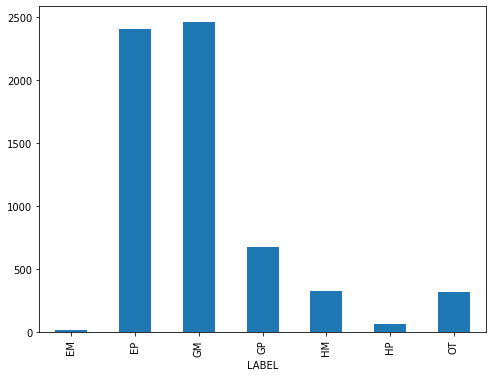

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('LABEL').cleaned.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df.cleaned).toarray()
labels = df.category_id
features.shape

(6266, 1448)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'EM':
  . Most correlated unigrams:
. પર
. पर
  . Most correlated bigrams:
. nice song
. himesh reshamiya
# 'EP':
  . Most correlated unigrams:
. super
. nice
  . Most correlated bigrams:
. very nice
. nice song
# 'GM':
  . Most correlated unigrams:
. nice
. ha
  . Most correlated bigrams:
. moj ha
. ha moj
# 'GP':
  . Most correlated unigrams:
. કર
. જર
  . Most correlated bigrams:
. અમ જર
. ખર ખર
# 'HM':
  . Most correlated unigrams:
. he
. hai
  . Most correlated bigrams:
. modi ko
. ke liye
# 'HP':
  . Most correlated unigrams:
. एक
. नह
  . Most correlated bigrams:
. very nice
. nice song
# 'OT':
  . Most correlated unigrams:
. ðÿ
. àª
  . Most correlated bigrams:
. ðÿ ðÿ
. àª àª


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['LABEL'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['EP']


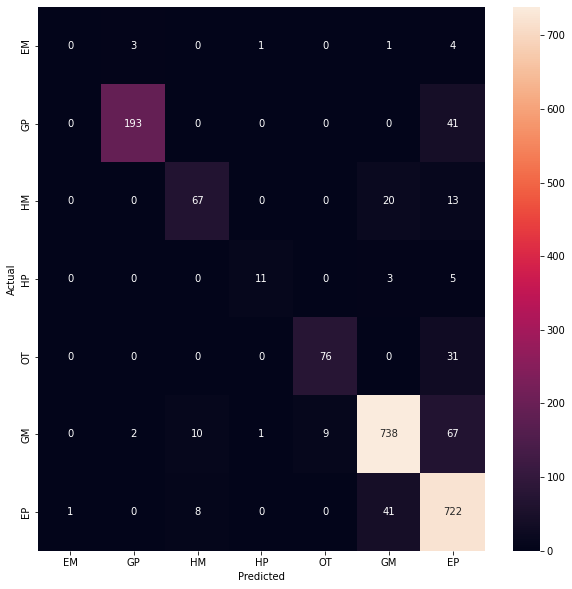

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.LABEL.values, yticklabels=category_id_df.LABEL.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(df.isnull().any())
display(df.head(10))

LABEL          False
cleaned        False
category_id    False
dtype: bool


,LABEL,cleaned,category_id
0,EM,થેંક્યુ સર,0
1,EM,વેરી ગુડ સાહેબ,0
2,EM,સુપર,0
3,EM,વેરી ગુડ હિમેશ રેશમિયા,0
4,EM,I m ગુજરાતીH R,0
5,EM,माई फेवरेट गाना,0
6,EM,Super bhai,0
7,EM,પિગ પિટ નાઆ આવ ઈન,0
8,EM,નાઈસ,0
9,EM,સુપર,0


In [ ]:
Y = df['LABEL'].values
X = df['cleaned'].values

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)

In [ ]:
# Make Machine Learning Pipeline with TfidfVectorizer and SVM
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
tfidf_vect = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
model = SVC(kernel = 'rbf')
text_clf = Pipeline([('tfidf', tfidf_vect),
                    ('clf', model),])

In [ ]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 3))),
                ('clf', SVC())])

In [ ]:
predictions = text_clf.predict(X_test)
predictions

array(['EP', 'GM', 'EP', ..., 'GM', 'GM', 'EP'], dtype=object)

In [ ]:
# Measure accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,predictions)

0.9170212765957447

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          EM       0.00      0.00      0.00         6
          EP       0.92      0.96      0.94       720
          GM       0.90      0.93      0.92       719
          GP       0.95      0.98      0.97       216
          HM       0.95      0.41      0.58        87
          HP       0.88      0.58      0.70        24
          OT       0.93      0.89      0.91       108

    accuracy                           0.92      1880
   macro avg       0.79      0.68      0.72      1880
weighted avg       0.91      0.92      0.91      1880



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

txt=['You speak હિન્દી in a good way',
     'और पाठ्य पुस्तकों, या यहाँ तक कि यदि का एक बहुत में आप इसे देखो पर अप',
     'maru name harshil chhe',
     'ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜']
pred = text_clf.predict(txt)
for i in pred :
        print(i)

EP
HP
GM
OT
